In [7]:
from langgraph.graph import StateGraph, START, END 
from dotenv import load_dotenv 
import os
from typing import TypedDict, Annotated, Literal
from pydantic import BaseModel, Field 
from langgraph.checkpoint.memory import InMemorySaver
from langchain_google_genai import ChatGoogleGenerativeAI

In [8]:
load_dotenv()
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash",
                               temperature=0.7, 
                               google_api_key=os.getenv("GOOGLE_API_KEY")
                               )

In [9]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str 

def generate_joke(state : JokeState) -> JokeState:
    prompt = f"Tell me a funny joke about {state['topic']}."
    joke = model.invoke(prompt) 
    return {"joke": joke} 

def explain_joke(state : JokeState) -> JokeState:
    prompt = f"Explain the following joke in simple terms: {state['joke']}"
    explanation = model.invoke(prompt) 
    return {"explanation": explanation}

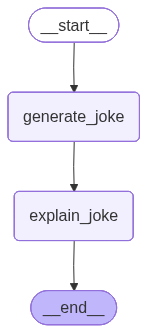

In [10]:
graph = StateGraph(JokeState) 

# add nodes 
graph.add_node("generate_joke", generate_joke)
graph.add_node("explain_joke", explain_joke)

# add edges
graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "explain_joke") 
graph.add_edge("explain_joke", END) 

# create an in-memory saver
checkpointer = InMemorySaver()

# execute the graph with persistence
workflow = graph.compile(checkpointer=checkpointer) 
workflow

In [11]:
config1= {"configurable": {"thread_id": "1"}} 
workflow.invoke({"topic": "computers"}, config=config1)

{'topic': 'computers',
 'joke': AIMessage(content="Why did the programmer quit their job?\n\nBecause they didn't get arrays! (A raise)", additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b756a-eba7-77b1-82e5-1817158431b2-0', usage_metadata={'input_tokens': 9, 'output_tokens': 1091, 'total_tokens': 1100, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 1070}}),
 'explanation': AIMessage(content='This joke plays on a **pun**, where two words or phrases that sound alike have very different meanings.\n\nHere\'s the breakdown:\n\n1.  **"Arrays"** (pronounced uh-RAYS): In computer programming, an **array** is a fundamental concept. It\'s a data structure used to store a collection of items (like numbers or words) in an organized way. Programmers work with arrays all the time.\n2.  **"A raise"** (pronounced uh RAYZ): This refers to an increas

In [12]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'computers', 'joke': AIMessage(content="Why did the programmer quit their job?\n\nBecause they didn't get arrays! (A raise)", additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b756a-eba7-77b1-82e5-1817158431b2-0', usage_metadata={'input_tokens': 9, 'output_tokens': 1091, 'total_tokens': 1100, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 1070}}), 'explanation': AIMessage(content='This joke plays on a **pun**, where two words or phrases that sound alike have very different meanings.\n\nHere\'s the breakdown:\n\n1.  **"Arrays"** (pronounced uh-RAYS): In computer programming, an **array** is a fundamental concept. It\'s a data structure used to store a collection of items (like numbers or words) in an organized way. Programmers work with arrays all the time.\n2.  **"A raise"** (pronounced uh RAYZ): This r

In [13]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'computers', 'joke': AIMessage(content="Why did the programmer quit their job?\n\nBecause they didn't get arrays! (A raise)", additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b756a-eba7-77b1-82e5-1817158431b2-0', usage_metadata={'input_tokens': 9, 'output_tokens': 1091, 'total_tokens': 1100, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 1070}}), 'explanation': AIMessage(content='This joke plays on a **pun**, where two words or phrases that sound alike have very different meanings.\n\nHere\'s the breakdown:\n\n1.  **"Arrays"** (pronounced uh-RAYS): In computer programming, an **array** is a fundamental concept. It\'s a data structure used to store a collection of items (like numbers or words) in an organized way. Programmers work with arrays all the time.\n2.  **"A raise"** (pronounced uh RAYZ): This 